## Same `.epr` echo protocol

Labelled plates 0 & 1

data:

``` sh
00.1-data/
├── echo-reports
├── picklists
├── platereader
└── uv-vis
```

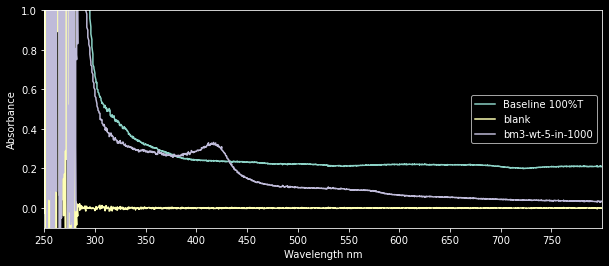

In [43]:
import matplotlib.pyplot as plt
import uv
plt.style.use('dark_background')

data = uv.P450('00.1-data/uv-vis/2022-03-02-00.1-prot-conc-0.csv')
uv.plot_traces(data.df)

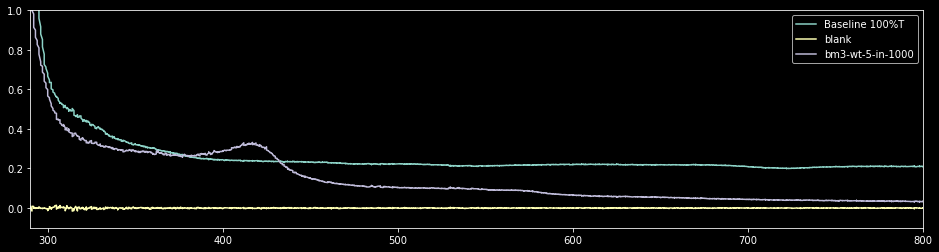

In [42]:
plt.figure(figsize=(16,4))
for i in data.df:
    plt.plot(data.df[i], label=i)
plt.legend()
plt.xlim(290,800)
plt.ylim(-0.1, 1)
plt.show()

## Multiple values for 420 nm 
Higher resolution than normal, had to manually scan speed setting.

In [31]:
data.concs(95)

,Baseline 100%T,blank,bm3-wt-5-in-1000
420,0.0,-2.474385,0.841683
420,0.0,-2.511758,0.828579
420,0.0,-2.535173,0.840492


## Well volume 40ul

In [17]:
c1 =  0.828579 / (5/1000)
v2 = 20_000 # ul
assert v2 > 384*40*1.2

print(c1)

def v1(c1,v2,c2):
    return (c2*v2)/c1

print(f'{v1(c1, v2, 4) } in {v2}ul')

165.7158
482.7542093149838 in 20000ul


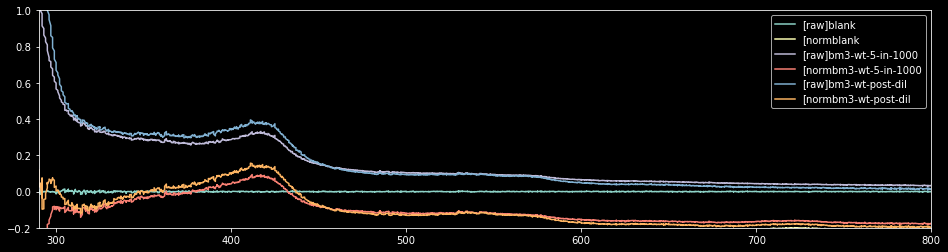

In [40]:
data2 = uv.P450('00.1-data/uv-vis/2022-03-02-00-conc-check-02.csv')

plt.figure(figsize=(16,4))
for i in data2.norm.columns[1:]:
    plt.plot(data2.df[i], label='[raw]'+i)
    plt.plot(data2.norm[i], label='[norm'+i)
plt.legend()
plt.xlim(290,800)
plt.ylim(-0.2, 1)
plt.show()

## Had leftover protein, experimented with well volumes

Vols incrament 10ul from 10 in col 1.

In [46]:
import plates

p = plates.Plate('00.1-data/platereader/00.1-2022-03-02-incr-prot-vol.CSV')
p.df

,220,221,222,223,224,225,226,227,228,229,...,791,792,793,794,795,796,797,798,799,800
A1,2.096,1.741,1.409,1.653,2.202,2.327,2.316,1.992,2.024,2.161,...,0.139,0.134,0.138,0.141,0.144,0.147,0.146,0.140,0.136,0.136
B1,3.500,2.464,3.500,1.755,2.034,2.591,1.968,1.939,2.108,2.391,...,0.093,0.090,0.092,0.095,0.097,0.100,0.101,0.094,0.090,0.091
C1,3.500,3.500,2.089,2.120,2.094,2.135,2.618,3.319,2.407,2.371,...,0.103,0.098,0.102,0.105,0.110,0.112,0.112,0.107,0.102,0.101
D1,2.596,3.500,2.254,3.500,3.500,2.417,1.905,2.045,2.167,2.515,...,0.044,0.040,0.044,0.047,0.050,0.053,0.053,0.047,0.043,0.042
E1,3.500,3.500,2.575,1.795,2.185,2.547,2.673,2.323,2.446,3.218,...,0.222,0.217,0.220,0.224,0.227,0.228,0.229,0.224,0.219,0.216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L12,1.643,1.778,1.768,1.641,1.583,1.861,2.046,1.943,2.522,2.260,...,0.036,0.036,0.037,0.037,0.037,0.038,0.038,0.037,0.036,0.038
M12,1.404,1.545,1.573,1.520,1.536,1.625,1.927,2.004,2.026,2.235,...,0.034,0.033,0.033,0.033,0.033,0.034,0.035,0.035,0.034,0.034
N12,1.691,1.476,1.425,1.641,1.966,1.780,1.867,1.827,1.974,2.368,...,0.035,0.035,0.035,0.034,0.034,0.036,0.036,0.036,0.035,0.035
O12,1.446,1.536,1.950,1.610,1.922,1.671,1.820,1.922,2.007,2.152,...,0.035,0.034,0.035,0.034,0.035,0.035,0.036,0.036,0.035,0.035


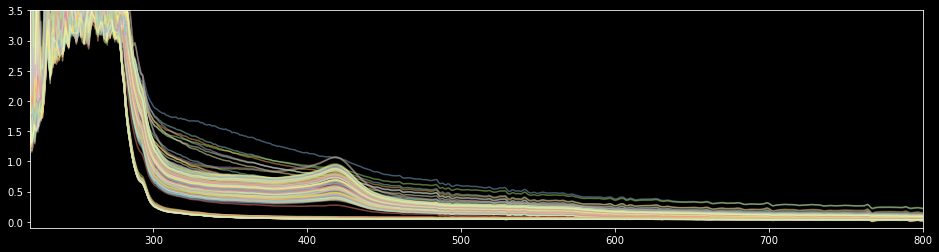

In [53]:
plt.figure(figsize=(16,4))
for i in p.df.index:
    plt.plot(p.df.loc[i,:],alpha=0.5)
plt.xlim(220,800)
plt.ylim(-0.1, 3.5)
plt.show()

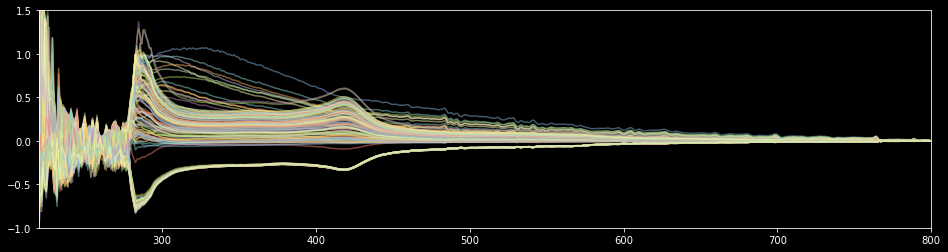

In [81]:
x = p.df

plt.figure(figsize=(16,4))
for i in x.index:
    plt.plot(x.loc[i,:] - x.loc[i,800],
             alpha=0.5)
plt.xlim(220,800)
plt.ylim(-1, 1.5)
plt.show()

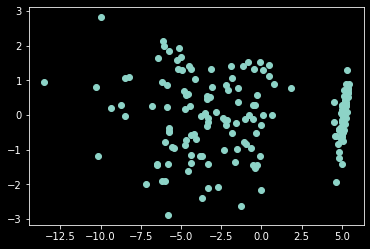

In [57]:
import numpy as np
from scipy import linalg 

def PCA(data, 
        dim=2):
    """
    from
    https://stackoverflow.com/questions/13224362/principal-component-analysis-pca-in-python
    returns: data transformed in 2 dims/columns + regenerated original data
    pass in: data as 2D NumPy array
    """
    m, n = data.shape
    # mean center the data
    data -= data.mean(axis=0)
    # calculate the covariance matrix
    R = np.cov(data, rowvar=False)
    # calculate eigenvectors & eigenvalues of the covariance matrix
    # use 'eigh' rather than 'eig' since R is symmetric, 
    # the performance gain is substantial
    evals, evecs = linalg.eigh(R)
    # sort eigenvalue in decreasing order
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    # sort eigenvectors according to same index
    evals = evals[idx]
    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    evecs = evecs[:, :dim]
    # carry out the transformation on the data using eigenvectors
    # and return the re-scaled data, eigenvalues, and eigenvectors
    return np.dot(evecs.T, data.T).T, evals, evecs

dot, evals, evecs = PCA(x)
plt.scatter(dot[:,0],dot[:,1])
plt.show()

## Empty wells


Index(['A8', 'B8', 'C8', 'D8', 'E8', 'F8', 'G8', 'H8', 'I8', 'J8', 'K8', 'L8',
       'M8', 'N8', 'O8', 'P8', 'A9', 'B9', 'C9', 'D9', 'E9', 'F9', 'G9', 'H9',
       'I9', 'J9', 'K9', 'L9', 'M9', 'N9', 'O9', 'P9', 'A10', 'B10', 'C10',
       'D10', 'E10', 'F10', 'G10', 'H10', 'I10', 'J10', 'K10', 'L10', 'M10',
       'N10', 'O10', 'P10', 'A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11',
       'H11', 'I11', 'J11', 'K11', 'L11', 'M11', 'N11', 'O11', 'P11', 'A12',
       'B12', 'C12', 'D12', 'E12', 'F12', 'G12', 'H12', 'I12', 'J12', 'K12',
       'L12', 'M12', 'N12', 'O12', 'P12'],
      dtype='object')


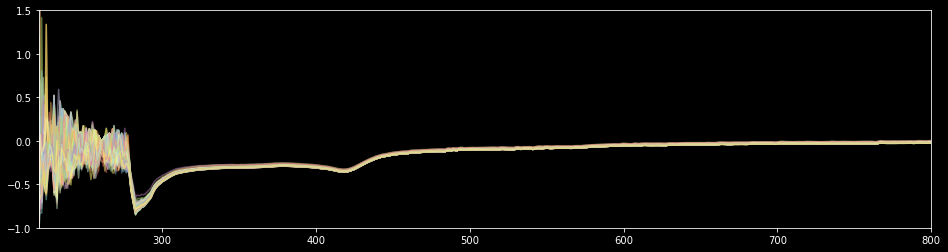

In [86]:
_cl1 = np.argwhere(dot[:,0] > 2.5).flatten().tolist()
print(x.index[_cl1])

plt.figure(figsize=(16,4))
for i in _cl1:
    plt.plot(x.iloc[i,:],
             alpha=0.5)
plt.xlim(220,800)
plt.ylim(-1, 1.5)
plt.show()

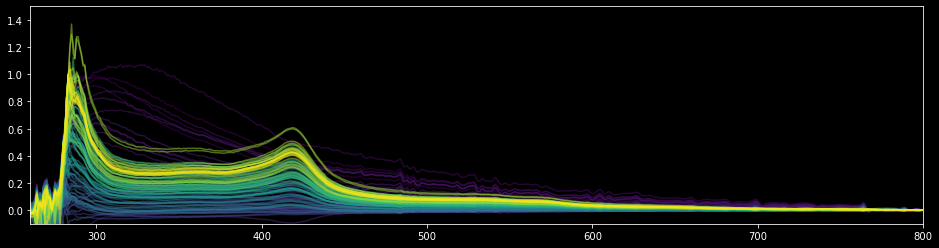

In [182]:
xx = x.drop(x.index[_cl1])

plt.figure(figsize=(16,4))
for idx,i in enumerate(xx.index):
    plt.plot(xx.loc[i,:] - xx.loc[i,800],
             c = plt.cm.viridis(idx/len(xx)),
             alpha=0.5)
plt.xlim(260,800)
plt.ylim(-0.1, 1.5)
plt.show()

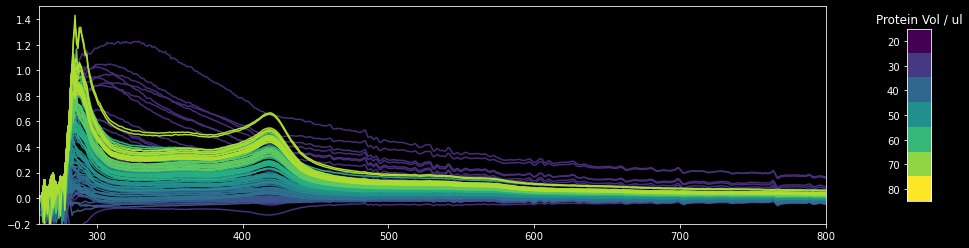

In [173]:
import matplotlib as mpl

vols = [20, 30, 40, 50, 60, 70, 80]

loc_re = lambda regex : xx.loc[xx.index.str.contains(regex), :]

fig, ax = plt.subplots(1,2,figsize=(16,4), gridspec_kw={'width_ratios': [32,1]})

for col in range(1,8):
    _col = loc_re(f'{col}')
    for i in _col.index:
        ax[0].plot(_col.loc[i,:], 
                c=plt.cm.viridis(col/8))

    ax[0].set_xlim(260,800)
    ax[0].set_ylim(-0.2, 1.5)

ax[1].imshow(rearrange(np.array(vols), 'n -> n ()'))
ax[1].set_yticks(range(len(vols)), vols)
ax[1].set_xticks([])
ax[1].set_title('Protein Vol / ul')
plt.show()

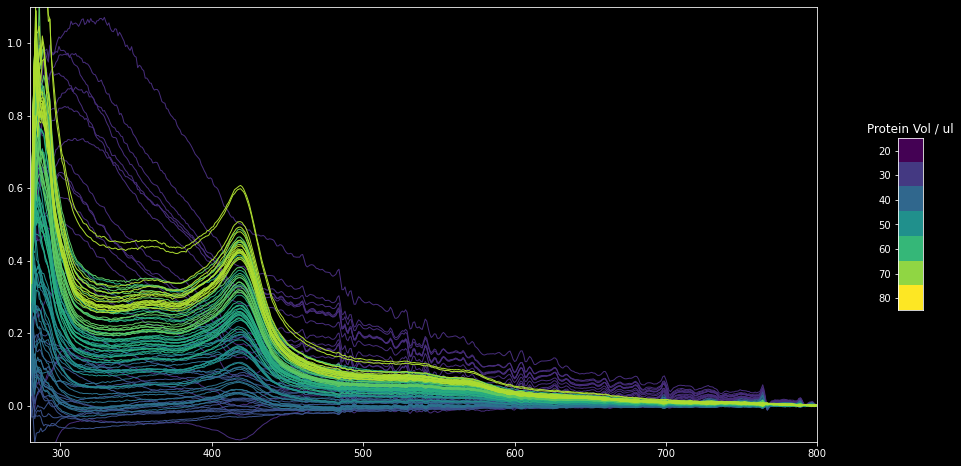

In [179]:

fig, ax = plt.subplots(1,2,figsize=(16,8), gridspec_kw={'width_ratios': [32,1]})

for col in range(1,8):
    _col = loc_re(f'{col}')
    for i in _col.index:
        ax[0].plot(_col.loc[i,:] - _col.loc[i,800], 
                c=plt.cm.viridis(col/8),
                  lw=1,
                  alpha=1)

    ax[0].set_xlim(280,800)
    ax[0].set_ylim(-0.1, 1.1)

ax[1].imshow(rearrange(np.array(vols), 'n -> n ()'))
ax[1].set_yticks(range(len(vols)), vols)
ax[1].set_xticks([])
ax[1].set_title('Protein Vol / ul')
plt.show()